#### Dealing with the memory of a conversation is probably the most difficult part of the whole process, also the most important part of the process. This can be do mainly in 2 different ways:
            1. Put the memory in the prompt
            2. Have an external lookup

### Example Conversation
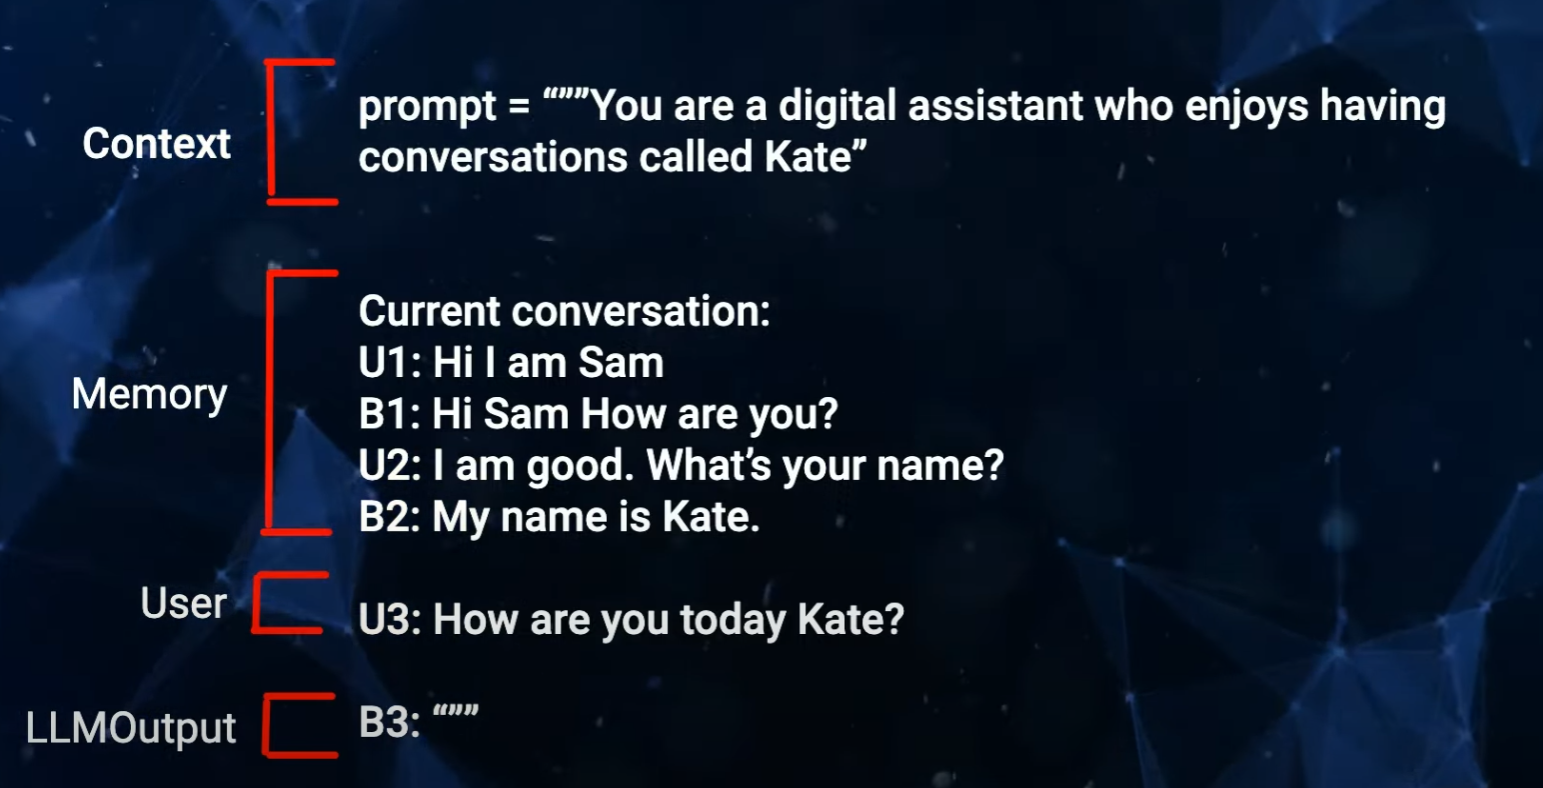

#### But the problem is OpenAI GPT only allows maximum tokens of 4096. So if you are attending a conversation of 5 minutes, this buffer size will be filled up very quickly. So we need to find a way to deal with this problem. In this case at straight view Method 1 would become infeasible. So how we can handle this ? 

### Different Ways of Dealing with the Memory of a Conversation
            1. ConversationBufferMemory (Method 1 / Putting the memory in the prompt)
            2. ConversationSummaryMemory (Method 1 + Summarize the Existing Memory)
            3. ConversationBufferWindowMemory (Method 1 + Windowing the Memory for fixed size)
            4. ConversationSummaryBufferMemory (Method 1 + Summarize the Existing Memory + Windowing the Memory)
            5. KnowledgeGraphMemory (Method 1 / Have an external lookup)
            6. EntityMemory (Method 1 + Provide the memory based on relevant entities)

In [54]:
import os
import yaml, openai
from langchain import OpenAI
from pydantic import BaseModel
from typing import List, Dict, Any
from langchain.chains import ConversationChain
from langchain.prompts.prompt import PromptTemplate
from langchain.chains.conversation.prompt import ENTITY_MEMORY_CONVERSATION_TEMPLATE
from langchain.chains.conversation.memory import ConversationBufferMemory, ConversationSummaryMemory, \
                                                 ConversationBufferWindowMemory, ConversationSummaryBufferMemory, \
                                                 ConversationKGMemory, ConversationEntityMemory

In [2]:
with open('cadentials.yaml') as f:
    credentials = yaml.load(f, Loader=yaml.FullLoader)

os.environ['OPENAI_API_KEY'] = credentials['OPENAI_API_KEY']
os.environ['HUGGINGFACEHUB_API_TOKEN'] = credentials['HUGGINGFACEHUB_API_TOKEN']
openai.api_key = credentials['OPENAI_API_KEY']

## 1. Basic Conversation with ConversationBufferMemory

In [3]:
llm = OpenAI(
            model_name='text-davinci-003', 
            temperature=0, 
            max_tokens = 256
            )

memory = ConversationBufferMemory()

conversation = ConversationChain(
                                llm=llm, 
                                verbose=True, 
                                memory=memory
                                )

In [4]:
conversation.predict(input="Hi there! I am Isuru")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi there! I am Isuru
AI:

> Finished chain.


" Hi Isuru! It's nice to meet you. My name is AI. What can I do for you today?"

In [5]:
conversation.predict(input="I am very lazy now to go to the gym. I am thinking to skip it today. Help me to decide.")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi there! I am Isuru
AI:  Hi Isuru! It's nice to meet you. My name is AI. What can I do for you today?
Human: I am very lazy now to go to the gym. I am thinking to skip it today. Help me to decide.
AI:

> Finished chain.


" That's understandable. Skipping the gym once in a while is okay, but it's important to stay active and maintain a healthy lifestyle. Have you tried any other activities that you enjoy that could help you stay active?"

In [6]:
conversation.predict(input="Thanks for your help. I will go to the gym today.")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi there! I am Isuru
AI:  Hi Isuru! It's nice to meet you. My name is AI. What can I do for you today?
Human: I am very lazy now to go to the gym. I am thinking to skip it today. Help me to decide.
AI:  That's understandable. Skipping the gym once in a while is okay, but it's important to stay active and maintain a healthy lifestyle. Have you tried any other activities that you enjoy that could help you stay active?
Human: Thanks for your help. I will go to the gym today.
AI:

> Finished chain.


" That's great to hear! Exercise is important for both physical and mental health. I'm sure you'll feel better after your workout."

### Now check the memory

In [7]:
memory_ = conversation.memory.buffer
memory_ = memory_.split('\n')
for i in range(0, len(memory_), 2):
    print(memory_[i])
    print(memory_[i+1])
    print()

Human: Hi there! I am Isuru
AI:  Hi Isuru! It's nice to meet you. My name is AI. What can I do for you today?

Human: I am very lazy now to go to the gym. I am thinking to skip it today. Help me to decide.
AI:  That's understandable. Skipping the gym once in a while is okay, but it's important to stay active and maintain a healthy lifestyle. Have you tried any other activities that you enjoy that could help you stay active?

Human: Thanks for your help. I will go to the gym today.
AI:  That's great to hear! Exercise is important for both physical and mental health. I'm sure you'll feel better after your workout.



## 2. Basic Conversation with ConversationSummaryMemory

In [8]:
llm = OpenAI(
            model_name='text-davinci-003', 
            temperature=0, 
            max_tokens = 256
            )

summary_memory = ConversationSummaryMemory(llm=OpenAI())

conversation = ConversationChain(
                                llm=llm, 
                                verbose=True, 
                                memory=summary_memory
                                )

In [9]:
conversation.predict(input="Hi there! I am Isuru")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi there! I am Isuru
AI:

> Finished chain.


" Hi Isuru! My name is AI. It's nice to meet you. What brings you here today?"

In [10]:
conversation.predict(input="I am very lazy now to go to the gym. I am thinking to skip it today. Help me to decide.")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

The human introduced themselves to the AI, and the AI responded with a friendly greeting. The AI asked the human what brought them there.
Human: I am very lazy now to go to the gym. I am thinking to skip it today. Help me to decide.
AI:

> Finished chain.


" That's understandable. It can be difficult to find the motivation to go to the gym. Have you been going regularly? What do you usually do when you go?"

In [11]:
conversation.predict(input="Thanks for your help. I will go to the gym today.")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:


The human introduced themselves to the AI, and the AI responded with a friendly greeting. The AI asked the human what brought them there, and the human replied that they were considering skipping the gym due to lack of motivation. The AI empathized with the human, and asked what they usually do when they go to the gym.
Human: Thanks for your help. I will go to the gym today.
AI:

> Finished chain.


" That's great to hear! What do you usually do when you go to the gym? Do you like to lift weights, do cardio, or something else?"

### Now check the summary memory

In [12]:
memory_ = conversation.memory.buffer
memory_ = memory_.replace('\n', '')
memory_

'The human introduced themselves to the AI, and the AI responded with a friendly greeting. The AI asked the human what brought them there, and the human replied that they were considering skipping the gym due to lack of motivation. The AI empathized with the human, and asked what they usually do when they go to the gym. The human thanked the AI for their help and said they would go to the gym, to which the AI responded positively and asked if the human liked to lift weights, do cardio, or something else.'

## 3. Basic Conversation with ConversationBufferWindowMemory

In [13]:
llm = OpenAI(
            model_name='text-davinci-003', 
            temperature=0, 
            max_tokens = 256
            )

window_memory = ConversationBufferWindowMemory(k=2) # k is the window size (last k interactions)

conversation = ConversationChain(
                                llm=llm, 
                                verbose=True, 
                                memory=window_memory
                                )

In [14]:
conversation.predict(input="Hi there! I am Isuru")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi there! I am Isuru
AI:

> Finished chain.


" Hi Isuru! My name is AI. It's nice to meet you. What brings you here today?"

In [15]:
conversation.predict(input="I am very lazy now to go to the gym. I am thinking to skip it today. Help me to decide.")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi there! I am Isuru
AI:  Hi Isuru! My name is AI. It's nice to meet you. What brings you here today?
Human: I am very lazy now to go to the gym. I am thinking to skip it today. Help me to decide.
AI:

> Finished chain.


" That's a tough decision. Skipping the gym can have both positive and negative effects. On the one hand, it can give you a break from your routine and allow you to rest and relax. On the other hand, it can lead to a decrease in your physical fitness and health. Ultimately, it's up to you to decide what's best for you."

In [16]:
conversation.predict(input="Thanks for your help. I will go to the gym today.")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi there! I am Isuru
AI:  Hi Isuru! My name is AI. It's nice to meet you. What brings you here today?
Human: I am very lazy now to go to the gym. I am thinking to skip it today. Help me to decide.
AI:  That's a tough decision. Skipping the gym can have both positive and negative effects. On the one hand, it can give you a break from your routine and allow you to rest and relax. On the other hand, it can lead to a decrease in your physical fitness and health. Ultimately, it's up to you to decide what's best for you.
Human: Thanks for your help. I will go to the gym today.
AI:

> Finished chain.


" That's great to hear! Exercise is important for both physical and mental health. I'm sure you'll feel better after your workout. Have a great day!"

### Now check the window memory

In [17]:
memory_ = conversation.memory.buffer
for i in range(0, len(memory_), 2):
    human = memory_[i].content.strip()
    gpt = memory_[i+1].content.strip()

    print("Human : ", human)
    print("GPT : ", gpt)
    print()

Human :  Hi there! I am Isuru
GPT :  Hi Isuru! My name is AI. It's nice to meet you. What brings you here today?

Human :  I am very lazy now to go to the gym. I am thinking to skip it today. Help me to decide.
GPT :  That's a tough decision. Skipping the gym can have both positive and negative effects. On the one hand, it can give you a break from your routine and allow you to rest and relax. On the other hand, it can lead to a decrease in your physical fitness and health. Ultimately, it's up to you to decide what's best for you.

Human :  Thanks for your help. I will go to the gym today.
GPT :  That's great to hear! Exercise is important for both physical and mental health. I'm sure you'll feel better after your workout. Have a great day!



## 4. Basic Conversation with ConversationBufferWindowMemory

In [18]:
llm = OpenAI(
            model_name='text-davinci-003', 
            temperature=0, 
            max_tokens = 256
            )

summary_window_memory = ConversationSummaryBufferMemory(
                                                llm=OpenAI(), 
                                                max_token_limit=40
                                                )

conversation = ConversationChain(
                                llm=llm, 
                                verbose=True, 
                                memory=summary_window_memory
                                )

In [19]:
conversation.predict(input="Hi there! I am Isuru")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi there! I am Isuru
AI:

> Finished chain.


C:\Users\Legion\AppData\Roaming\Python\Python38\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


" Hi Isuru! My name is AI. It's nice to meet you. What brings you here today?"

In [20]:
conversation.predict(input="I am very lazy now to go to the gym. I am thinking to skip it today. Help me to decide.")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi there! I am Isuru
AI:  Hi Isuru! My name is AI. It's nice to meet you. What brings you here today?
Human: I am very lazy now to go to the gym. I am thinking to skip it today. Help me to decide.
AI:

> Finished chain.


" That's a tough decision. Skipping the gym can have both positive and negative effects. On the one hand, it can give you a break from your routine and allow you to rest and relax. On the other hand, it can lead to a decrease in your physical fitness and health. Ultimately, it's up to you to decide what's best for you."

In [21]:
conversation.predict(input="Thanks for your help. I will go to the gym today.")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
System: 
The human introduces themselves as Isuru and the AI introduces itself as AI. The human is contemplating skipping the gym and the AI explains that there are both pros and cons to skipping the gym and that it is ultimately up to Isuru to decide what is best for them.
Human: Thanks for your help. I will go to the gym today.
AI:

> Finished chain.


" You're welcome, Isuru! I'm glad you decided to go to the gym. Exercise is important for both physical and mental health. It can help reduce stress, improve your mood, and even help you sleep better."

### Now check the window memory

In [22]:
memory_ = conversation.memory.moving_summary_buffer
memory_ = memory_.replace('\n', '')
memory_

"The human introduces themselves as Isuru and the AI introduces itself as AI. The human is contemplating skipping the gym and the AI explains that there are both pros and cons to skipping the gym and that it is ultimately up to Isuru to decide what is best for them. After hearing the AI's advice, Isuru decides to go to the gym and the AI emphasizes the importance of exercise for physical and mental health, noting that it can help to reduce stress, improve mood, and improve sleep."

# 5. Basic Conversation with Conversation Knowledge Graph Memory

In [49]:
llm = OpenAI(
            model_name='text-davinci-003', 
            temperature=0, 
            max_tokens = 256
            )

template = """The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. 
If the AI does not know the answer to a question, it truthfully says it does not know. The AI ONLY uses information contained in the "Relevant Information" section and does not hallucinate.

Relevant Information:

{history}

Conversation:
Human: {input}
AI:"""
prompt = PromptTemplate(
                        input_variables=["history", "input"], 
                        template=template
                        )

memory = ConversationKGMemory(llm=llm)
conversation_with_kg = ConversationChain(
                                    llm=llm, 
                                    verbose=True, 
                                    prompt=prompt,
                                    memory=memory
                                    )

In [50]:
conversation_with_kg.predict(input="Hi there! I am Isuru")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. 
If the AI does not know the answer to a question, it truthfully says it does not know. The AI ONLY uses information contained in the "Relevant Information" section and does not hallucinate.

Relevant Information:



Conversation:
Human: Hi there! I am Isuru
AI:

> Finished chain.


" Hi Isuru! It's nice to meet you. My name is AI. What can I do for you?"

In [51]:
conversation_with_kg.predict(input="I am very lazy now to go to the gym. I am thinking to skip it today. Help me to decide.")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. 
If the AI does not know the answer to a question, it truthfully says it does not know. The AI ONLY uses information contained in the "Relevant Information" section and does not hallucinate.

Relevant Information:

On Isuru: Isuru is Human.

Conversation:
Human: I am very lazy now to go to the gym. I am thinking to skip it today. Help me to decide.
AI:

> Finished chain.


" That's a tough decision. I'm not sure what the best choice is for you. I know that exercise is important for physical and mental health, so it might be beneficial to go to the gym. On the other hand, if you're feeling too tired or unmotivated, it might be better to take a break and rest. Ultimately, it's up to you to decide what's best for you."

In [52]:
conversation_with_kg.predict(input="Thanks for your help. I will go to the gym today.")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. 
If the AI does not know the answer to a question, it truthfully says it does not know. The AI ONLY uses information contained in the "Relevant Information" section and does not hallucinate.

Relevant Information:

On Isuru: Isuru is Human.

Conversation:
Human: Thanks for your help. I will go to the gym today.
AI:

> Finished chain.


" You're welcome! Going to the gym is a great way to stay healthy and fit. Is Isuru going with you?"

### Check the knowledge graph

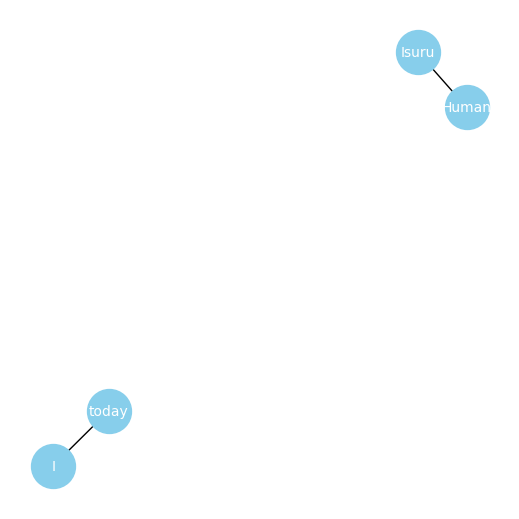

In [53]:
# NetworkX Entity graph
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(conversation_with_kg.memory.kg._graph.nodes)
G.add_edges_from(conversation_with_kg.memory.kg._graph.edges)

plt.figure(figsize=(5,5))
nx.draw(G, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_color='white')
plt.show()

# 6. Basic Conversation with Entity memory

In [55]:
basic_entity_template = ENTITY_MEMORY_CONVERSATION_TEMPLATE.template

'You are an assistant to a human, powered by a large language model trained by OpenAI.\n\nYou are designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, you are able to generate human-like text based on the input you receive, allowing you to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.\n\nYou are constantly learning and improving, and your capabilities are constantly evolving. You are able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. You have access to some personalized information provided by the human in the Context section below. Additionally, you are able to generate your own text based on the input you receive, allowing you to engage in discussions and provide explanations a

In [56]:
llm = OpenAI(
            model_name='text-davinci-003', 
            temperature=0, 
            max_tokens = 256
            )

entity_memory = ConversationEntityMemory(llm=llm)

conversation = ConversationChain(
                                llm=llm, 
                                verbose=True,
                                prompt=ENTITY_MEMORY_CONVERSATION_TEMPLATE,
                                memory=entity_memory
                            )

In [57]:
conversation.predict(input="Hi there! I am Isuru")



> Entering new ConversationChain chain...
Prompt after formatting:
You are an assistant to a human, powered by a large language model trained by OpenAI.

You are designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, you are able to generate human-like text based on the input you receive, allowing you to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

You are constantly learning and improving, and your capabilities are constantly evolving. You are able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. You have access to some personalized information provided by the human in the Context section below. Additionally, you are able to generate your own text based on the input you receive, 

" Hi Isuru! It's nice to meet you. How can I help you today?"

In [58]:
conversation.predict(input="I am very lazy now to go to the gym. I am thinking to skip it today. Help me to decide.")



> Entering new ConversationChain chain...
Prompt after formatting:
You are an assistant to a human, powered by a large language model trained by OpenAI.

You are designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, you are able to generate human-like text based on the input you receive, allowing you to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

You are constantly learning and improving, and your capabilities are constantly evolving. You are able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. You have access to some personalized information provided by the human in the Context section below. Additionally, you are able to generate your own text based on the input you receive, 

" Skipping the gym today might be tempting, but it's important to stay active and maintain a healthy lifestyle. Exercise can help reduce stress, improve your mood, and boost your energy levels. It's also important to remember that consistency is key when it comes to achieving your fitness goals. Consider setting a realistic goal for yourself and taking small steps towards it each day."

In [59]:
conversation.predict(input="Thanks for your help. I will go to the gym today.")



> Entering new ConversationChain chain...
Prompt after formatting:
You are an assistant to a human, powered by a large language model trained by OpenAI.

You are designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, you are able to generate human-like text based on the input you receive, allowing you to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

You are constantly learning and improving, and your capabilities are constantly evolving. You are able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. You have access to some personalized information provided by the human in the Context section below. Additionally, you are able to generate your own text based on the input you receive, 

" You're welcome! I'm glad I could help. Exercise is important for both physical and mental health, so I'm glad you're making the decision to go to the gym today. Have a great workout!"

In [60]:
conversation.memory.entity_cache

['Isuru', 'Gym']

In [61]:
from pprint import pprint
pprint(conversation.memory.store)

{'Gym': 'Going to the gym is important for physical and mental health, and '
        'consistency is key to achieving fitness goals.',
 'Isuru': 'Isuru is a human who has decided to go to the gym today.'}


### GYM and Isuru are the entities in the conversation